## Importing necessary libraries/modules for preprocessing and visualising data 

In [1]:
import cv2
import json
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
import dlib
from tqdm import tqdm
import scipy.io 
import pickle

In [2]:
# Extracting Frames from the videos
def extract_frames(video_path, output_folder):
    cap = cv2.VideoCapture(video_path)
    # If no videos found 
    if not cap.isOpened():
        print(f"Error: Unable to open video file {video_path}.")
        return

    os.makedirs(output_folder, exist_ok=True)
    frame_count = 0
    with tqdm(total=int(cap.get(cv2.CAP_PROP_FRAME_COUNT)), desc="Extracting frames") as pbar:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            output_path = os.path.join(output_folder, f"{frame_count}.jpg")
            cv2.imwrite(output_path, frame)
            frame_count += 1
            pbar.update(1)
    cap.release()

videos_dir = os.listdir('videos') # rename to videos for all left videos 
for video in videos_dir:
    video_name = os.path.splitext(video)[0]
    print(f'Reading {video_name}')
    extract_frames(os.path.join('videos', video), os.path.join('frames', video_name))


Reading LeftVideoSN028_comp


Extracting frames: 100%|██████████| 4845/4845 [01:25<00:00, 56.61it/s]


Reading LeftVideoSN029_comp


Extracting frames: 100%|██████████| 4845/4845 [01:22<00:00, 58.66it/s]


Reading LeftVideoSN016_comp


Extracting frames: 100%|██████████| 4845/4845 [01:34<00:00, 51.16it/s]


Reading LeftVideoSN017_comp


Extracting frames: 100%|██████████| 4845/4845 [01:27<00:00, 55.46it/s]


Reading LeftVideoSN023_comp


Extracting frames: 100%|██████████| 4845/4845 [01:23<00:00, 58.20it/s]


Reading LeftVideoSN001_comp


Extracting frames: 100%|██████████| 4845/4845 [01:27<00:00, 55.50it/s]


Reading LeftVideoSN006_comp


Extracting frames: 100%|██████████| 4845/4845 [01:27<00:00, 55.48it/s]


Reading LeftVideoSN007_comp


Extracting frames: 100%|██████████| 4845/4845 [01:22<00:00, 58.92it/s]


Reading LeftVideoSN032_comp


Extracting frames: 100%|██████████| 4845/4845 [01:22<00:00, 58.48it/s]


Reading LeftVideoSN011_comp


Extracting frames: 100%|██████████| 4845/4845 [01:28<00:00, 54.84it/s]


Reading LeftVideoSN010_comp


Extracting frames: 100%|██████████| 4844/4844 [01:26<00:00, 56.01it/s]


Reading LeftVideoSN025_comp


Extracting frames: 100%|██████████| 4845/4845 [01:22<00:00, 58.69it/s]


Reading LeftVideoSN024_comp


Extracting frames: 100%|██████████| 4845/4845 [01:25<00:00, 56.92it/s]


Reading LeftVideoSN008_comp


Extracting frames: 100%|██████████| 4845/4845 [01:25<00:00, 56.89it/s]


Reading LeftVideoSN002_comp


Extracting frames: 100%|██████████| 4845/4845 [01:31<00:00, 52.91it/s]


Reading LeftVideoSN003_comp


Extracting frames: 100%|██████████| 4845/4845 [01:30<00:00, 53.64it/s]


Reading LeftVideoSN021_comp


Extracting frames: 100%|██████████| 4845/4845 [01:21<00:00, 59.72it/s]


Reading LeftVideoSN026_comp


Extracting frames: 100%|██████████| 4845/4845 [01:29<00:00, 54.17it/s]


Reading LeftVideoSN027_comp


Extracting frames: 100%|██████████| 4845/4845 [01:26<00:00, 55.74it/s]


Reading LeftVideoSN018_comp


Extracting frames: 100%|██████████| 4845/4845 [01:35<00:00, 50.53it/s]


Reading LeftVideoSN012_comp


Extracting frames: 100%|██████████| 4845/4845 [01:29<00:00, 54.01it/s]


Reading leftVideoSN013_comp


Extracting frames: 100%|██████████| 4845/4845 [01:29<00:00, 54.41it/s]


Reading LeftVideoSN031_comp


Extracting frames: 100%|██████████| 4845/4845 [01:26<00:00, 55.78it/s]


Reading LeftVideoSN030_comp


Extracting frames: 100%|██████████| 4845/4845 [01:21<00:00, 59.72it/s]


Reading LeftVideoSN005_comp


Extracting frames: 100%|██████████| 4845/4845 [01:25<00:00, 56.65it/s]


Reading LeftVideoSN004_comp


Extracting frames: 100%|██████████| 4845/4845 [01:28<00:00, 54.97it/s]


### Assigning values to subjects 

In [3]:
# Updated to ensure only directories are processed
subjectIds = [d for d in os.listdir('AU_values') if os.path.isdir(os.path.join('AU_values', d)) and d.startswith('SN')]
subjectIds.sort()
auSub = []

#Assigning AU values 
for i in subjectIds:
    au_path = os.path.join("AU_values", i)
    if os.path.isdir(au_path):
        auFiles = [f for f in os.listdir(au_path) if not f.startswith('.')]
        auFiles.sort()
        auData = []
        for j in auFiles:
            auPath = os.path.join(au_path, j)
            auTemp = []
            with open(auPath, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    parts = line.strip().split(',')
                    auTemp.append(int(parts[1]))
            auValues = {
                "id": j,
                "values": auTemp
            }
            auData.append(auValues)
        auSubject = {
            "id": i,
            "data": auData
        }
        auSub.append(auSubject)

#Assigning Landmark points 
for i in subjectIds:
    lm_path = os.path.join("Landmark_Points", i, "tmp_frame_lm")
    if os.path.isdir(lm_path):
        matFiles = [f for f in os.listdir(lm_path) if f.endswith('.mat')]
        matFiles.sort()
        temp = []
        filename = os.path.join("json", i + ".json")
        for j, matFile in enumerate(matFiles):
            matPath = os.path.join(lm_path, matFile)
            
            mat = scipy.io.loadmat(matPath)
            mat = mat['pts']
            frame = {
                "id" : j,
                "landmarks" : mat.tolist(),
                "au1": auData[0]['values'][j],
                "au12": auData[1]['values'][j],
                "au15": auData[2]['values'][j],
                "au17": auData[3]['values'][j],
                "au2": auData[4]['values'][j],
                "au20": auData[5]['values'][j],
                "au25": auData[6]['values'][j],
                "au26": auData[7]['values'][j],
                "au4": auData[8]['values'][j],
                "au5": auData[9]['values'][j],
                "au6": auData[10]['values'][j],
                "au9": auData[11]['values'][j]
            }
            temp.append(frame)
        with open(filename, 'w') as f:
            json.dump(temp, f, indent=4)



#### Cropping each frame 

In [4]:
#Cropping images to remove the background and capture the face
def crop_images(subject_id):
    frames_dir = os.path.join("frames", f"LeftVideo{subject_id}_comp")
    json_file = os.path.join("json", f"{subject_id}.json")
    
    if not os.path.exists(json_file):
        print(f"No JSON file found for subject {subject_id}. Skipping...")
        return
    
    with open(json_file, 'r') as file:
        landmarks = json.load(file)
    
    cropped_dir = os.path.join("croppedImg", subject_id)
    os.makedirs(cropped_dir, exist_ok=True)
    
    for i in tqdm(range(len(landmarks)), desc=f"Cropping for {subject_id}"):
        frame_path = os.path.join(frames_dir, f"{i}.jpg")
        img = cv2.imread(frame_path)
        if img is not None:
            points = np.array([(p[0], p[1]) for p in landmarks[i]['landmarks']], dtype=np.int32)
            hull = cv2.convexHull(points)
            mask = np.zeros(img.shape[:2], dtype=np.uint8)
            cv2.fillConvexPoly(mask, hull, 255)
            face_image = cv2.bitwise_and(img, img, mask=mask)
            x, y, w, h = cv2.boundingRect(hull)
            face_image_cropped = face_image[y:y+h, x:x+w]
            cv2.imwrite(os.path.join(cropped_dir, f"{i}.jpg"), face_image_cropped)

for subject_id in subjectIds:
    crop_images(subject_id)


Cropping for SN009:   0%|          | 0/4845 [00:00<?, ?it/s][ WARN:0@3106.153] global loadsave.cpp:248 findDecoder imread_('frames/LeftVideoSN009_comp/0.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3106.153] global loadsave.cpp:248 findDecoder imread_('frames/LeftVideoSN009_comp/1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3106.153] global loadsave.cpp:248 findDecoder imread_('frames/LeftVideoSN009_comp/2.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3106.153] global loadsave.cpp:248 findDecoder imread_('frames/LeftVideoSN009_comp/3.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3106.153] global loadsave.cpp:248 findDecoder imread_('frames/LeftVideoSN009_comp/4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3106.153] global loadsave.cpp:248 findDecoder imread_('frames/LeftVideoSN009_comp/5.jpg'): can't open/read file: check file path/integrity
[ WARN:0@3106.153] global loadsave.cpp:248 findDecod

### Drawing Landmarks on the faces


In [5]:

def draw_landmarks(subject_id):
    json_file = os.path.join('json', f'{subject_id}.json')
    
    if not os.path.exists(json_file):
        print(f"No JSON file found for subject {subject_id}. Skipping...")
        return
    
    with open(json_file, 'r') as file:
        landmarks = json.load(file)
    
    # Assuming the first frame will be used to draw landmarks
    img_path = os.path.join("frames", f"LeftVideo{subject_id}_comp", "0.jpg")
    img = cv2.imread(img_path)
    
    if img is not None:
        for landmark in landmarks[0]['landmarks']:
            cv2.circle(img, (int(landmark[0]), int(landmark[1])), 1, (0, 255, 255), 1)
        
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Landmarks for Subject {subject_id}")
        plt.show()
    
for subject_id in subjectIds:
    draw_landmarks(subject_id)


[ WARN:0@4514.471] global loadsave.cpp:248 findDecoder imread_('frames/LeftVideoSN009_comp/0.jpg'): can't open/read file: check file path/integrity
[ WARN:0@4516.744] global loadsave.cpp:248 findDecoder imread_('frames/LeftVideoSN013_comp/0.jpg'): can't open/read file: check file path/integrity


##### Graphical representation of landmarks for better understanding

/tmp/ipykernel_7725/2533551836.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


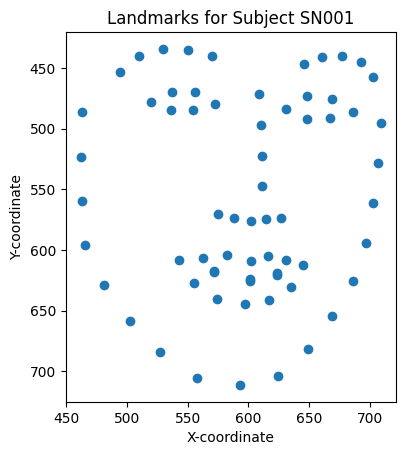

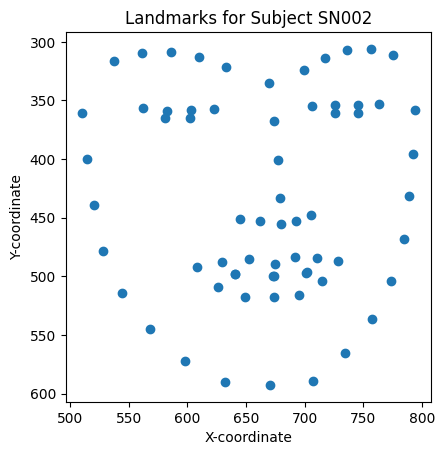

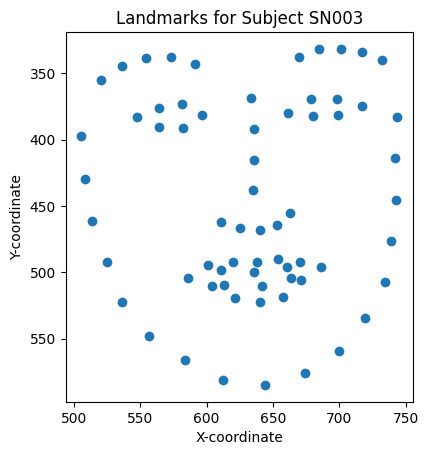

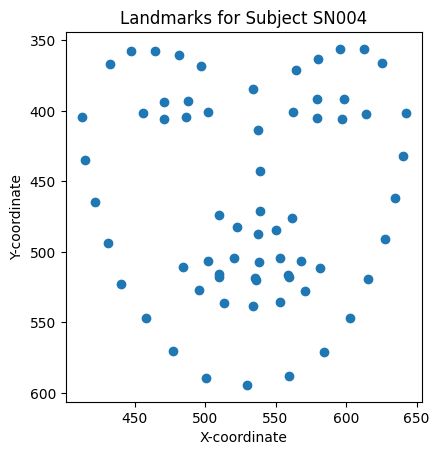

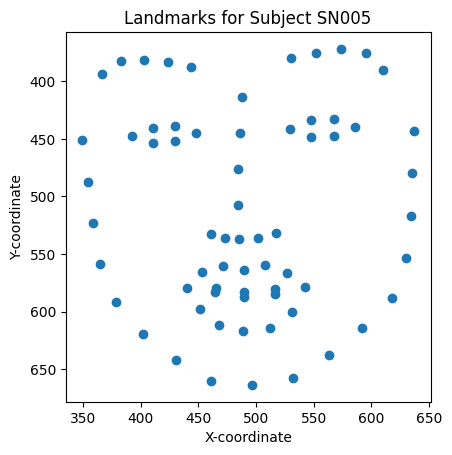

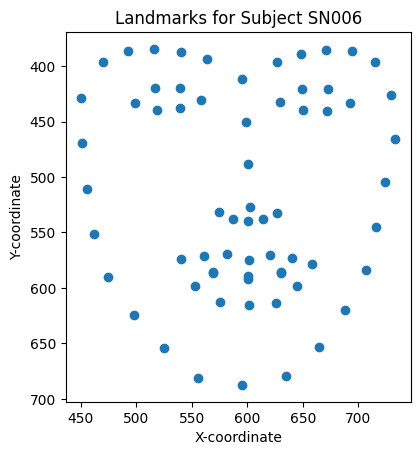

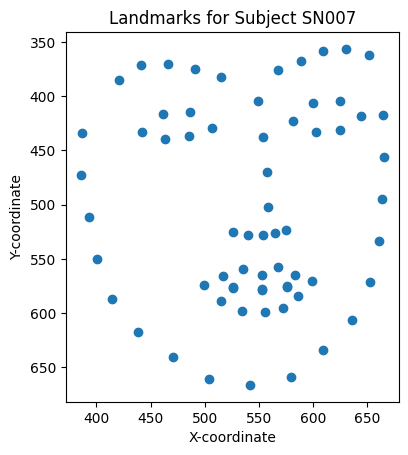

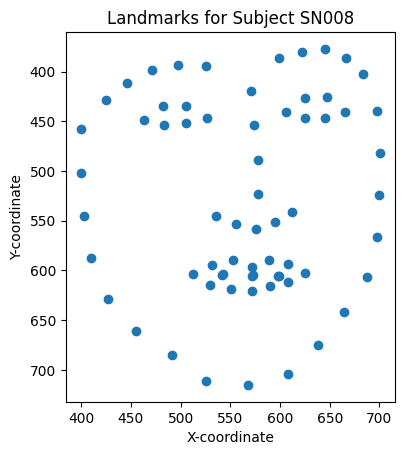

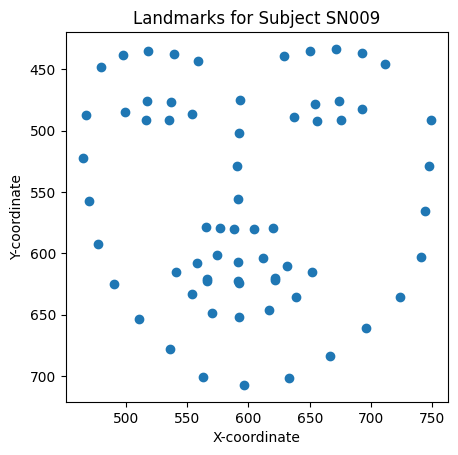

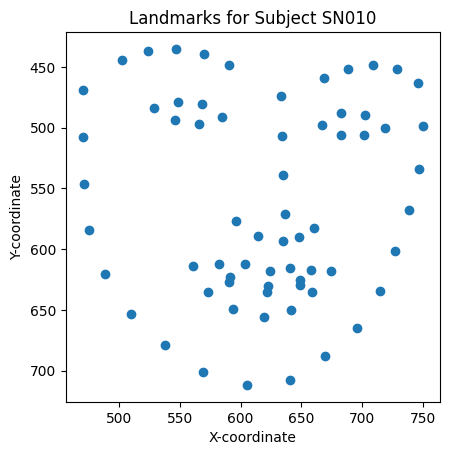

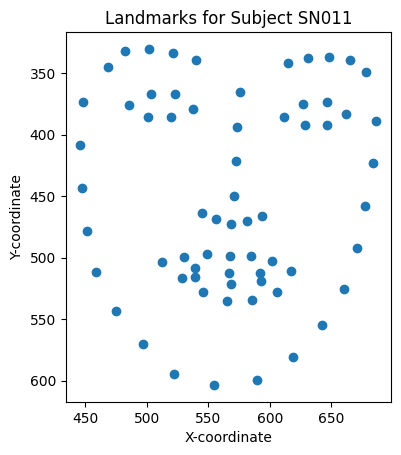

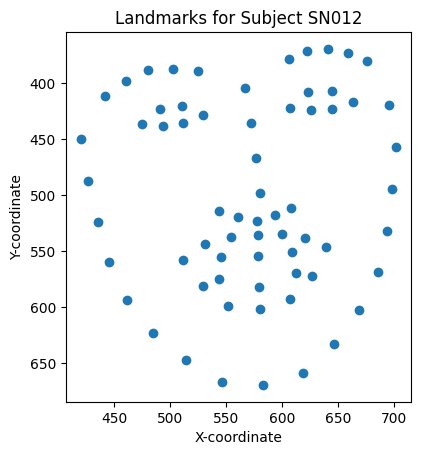

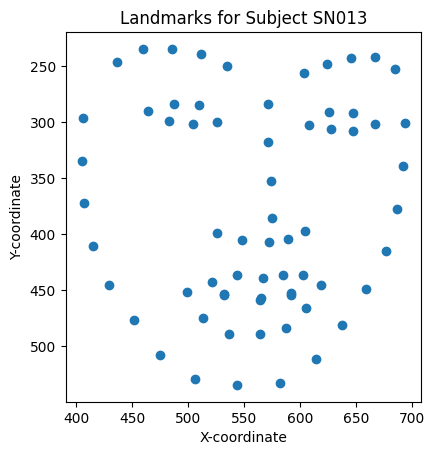

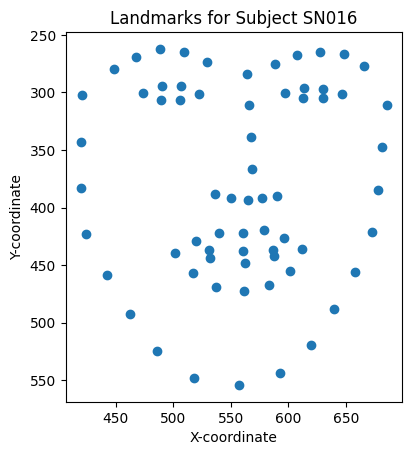

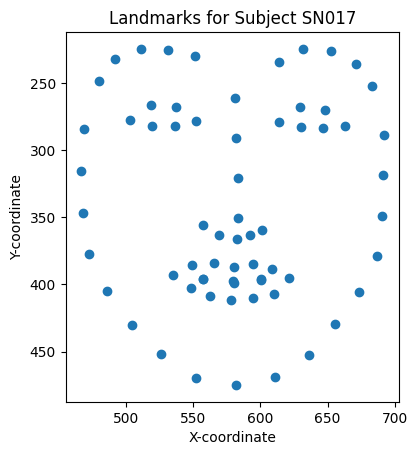

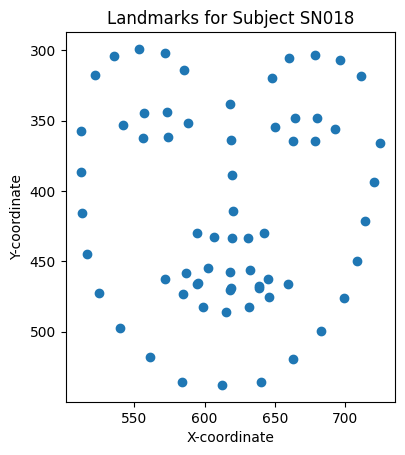

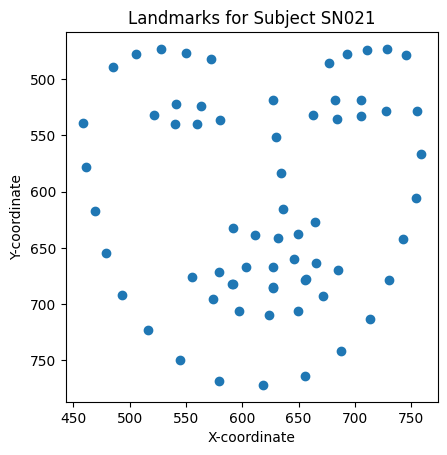

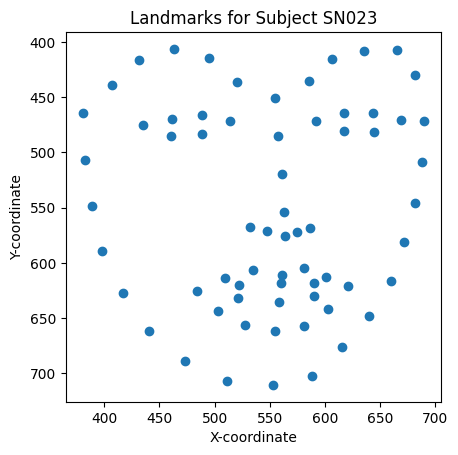

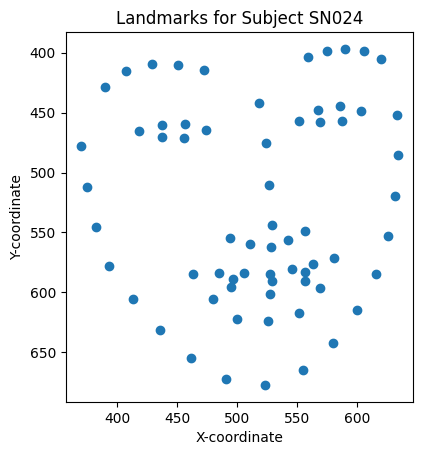

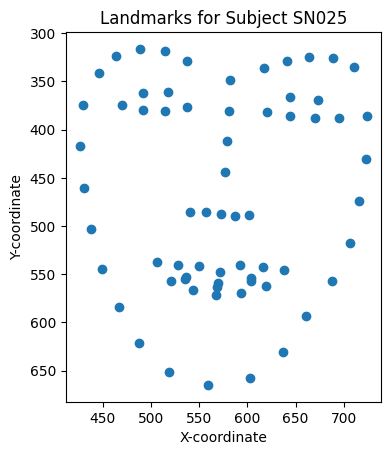

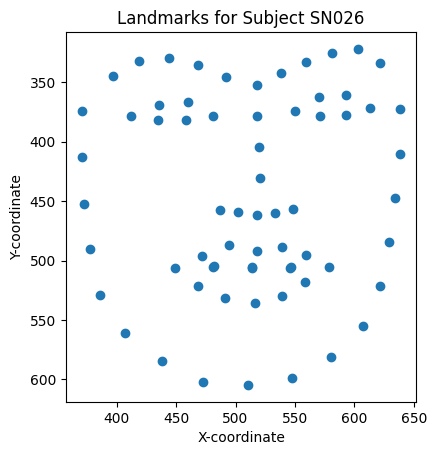

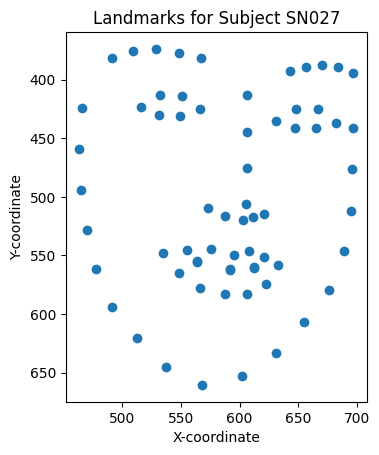

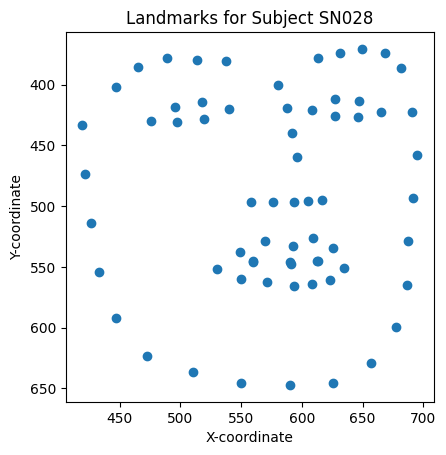

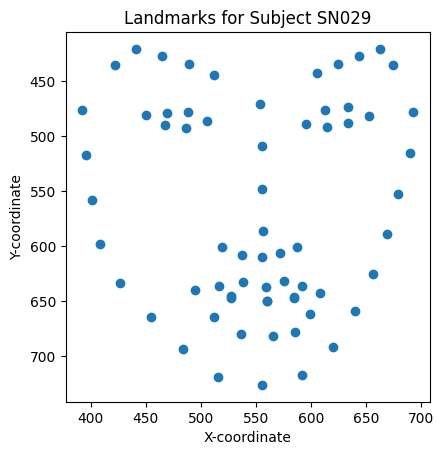

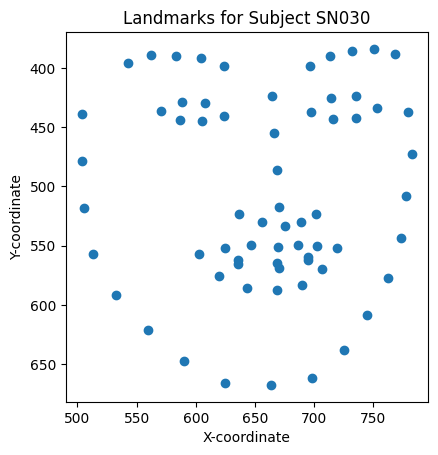

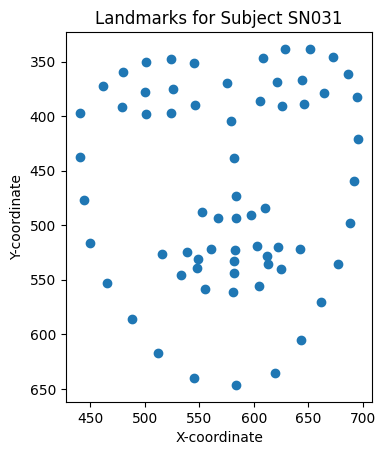

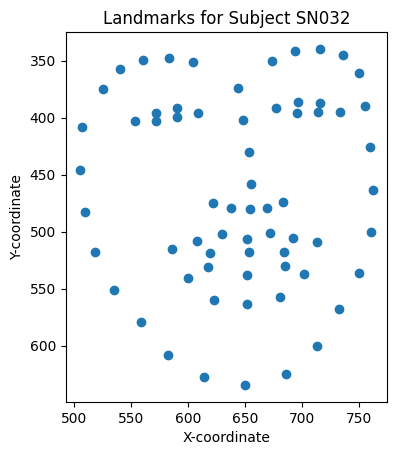

In [7]:
def visualizar_landmarks(landmarks, title="Facial Landmarks"):
    fig, ax = plt.subplots()
    xs = [p[0] for p in landmarks]
    ys = [p[1] for p in landmarks]
    ax.plot(xs, ys, 'o')
    ax.set_aspect('equal')
    ax.invert_yaxis()  # Inverting y-axis for image coordinates
    plt.title(title)
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.show()

for subject_id in subjectIds:
    json_file = os.path.join('json', f'{subject_id}.json')
    with open(json_file, 'r') as file:
        landmarks_data = json.load(file)
    visualizar_landmarks(landmarks_data[0]['landmarks'], f"Landmarks for Subject {subject_id}")


### Color map of average facial points of subjects 

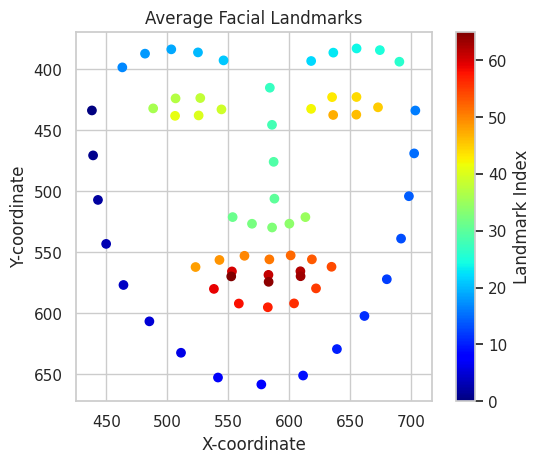

In [9]:
def calculate_average_landmarks(subject_ids, json_dir='json'):
    all_landmarks = []
    for subject_id in subject_ids:
        json_file = os.path.join(json_dir, f'{subject_id}.json')
        with open(json_file, 'r') as file:
            landmarks_data = json.load(file)
            for frame_data in landmarks_data:
                all_landmarks.append(frame_data['landmarks'])
    mean_landmarks = np.mean(all_landmarks, axis=0)
    return mean_landmarks

def visualize_average_landmarks(average_landmarks, title="Average Facial Landmarks"):
    fig, ax = plt.subplots()
    xs, ys = zip(*average_landmarks)
    sc = ax.scatter(xs, ys, c=np.arange(len(xs)), cmap='jet')
    plt.colorbar(sc, label='Landmark Index')
    ax.set_aspect('equal')
    ax.invert_yaxis()
    plt.title(title)
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.show()

subject_ids = [d[:-5] for d in os.listdir('json') if d.endswith('.json')]

average_landmarks = calculate_average_landmarks(subject_ids)
visualize_average_landmarks(average_landmarks)


### Drawing Landmarks on subejcts for better understanding and visualizaiton

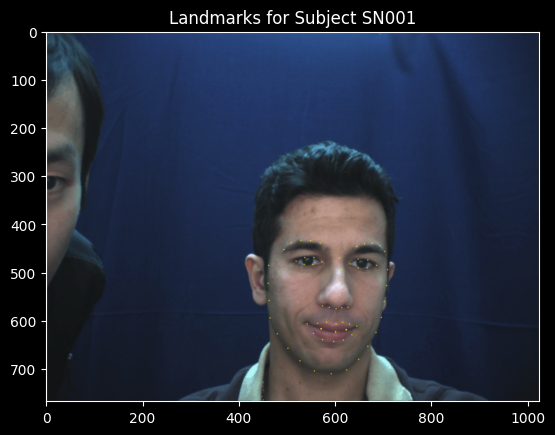

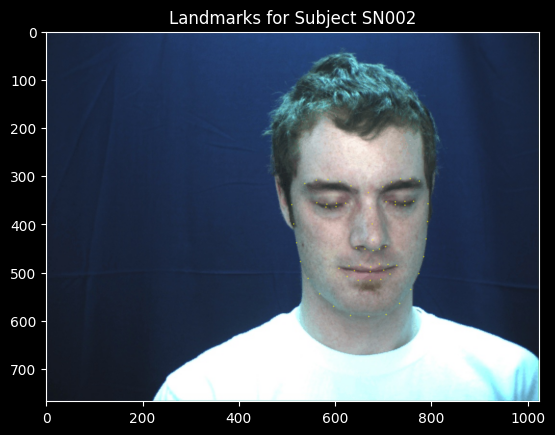

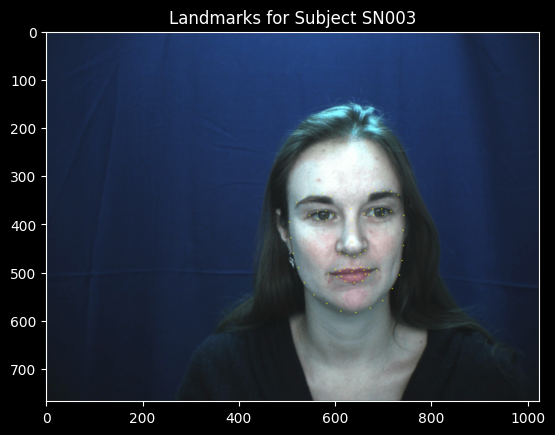

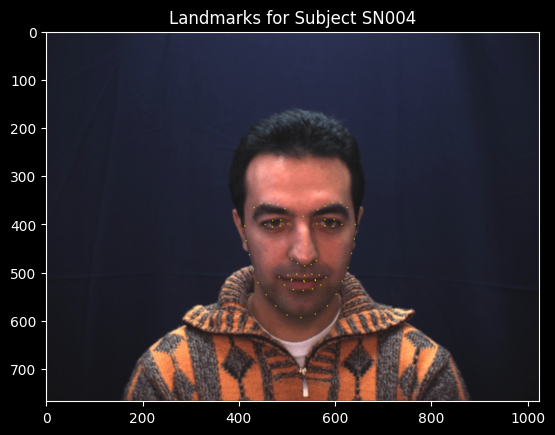

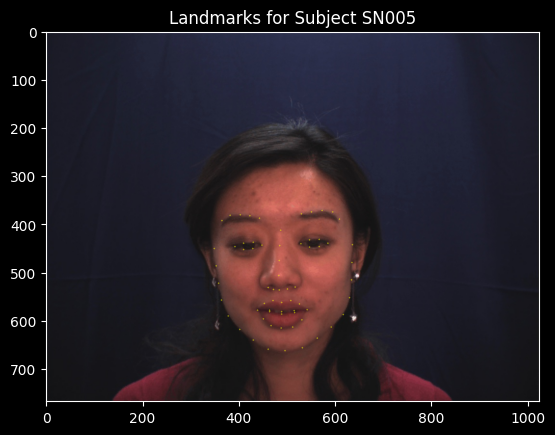

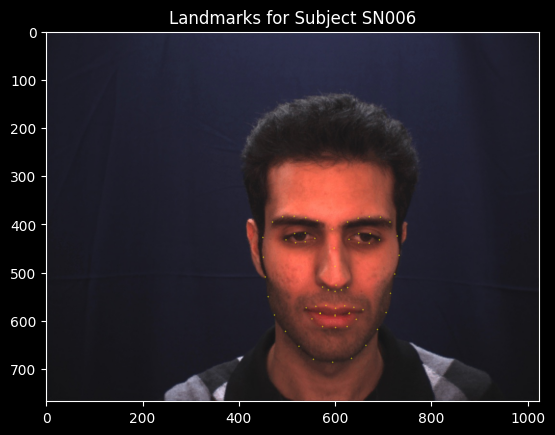

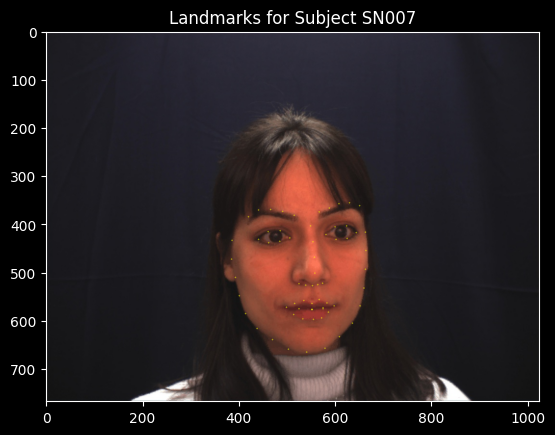

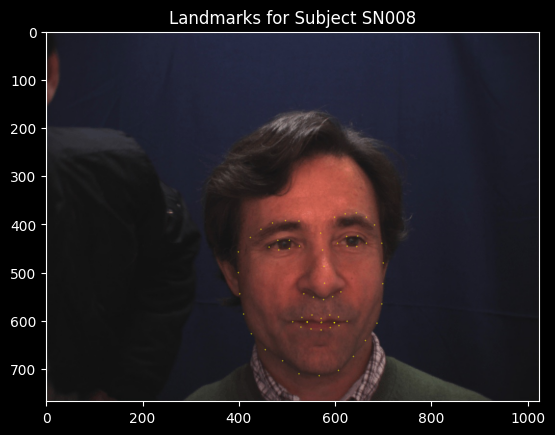

[ WARN:0@1564.647] global loadsave.cpp:248 findDecoder imread_('frames/LeftVideoSN009_comp/0.jpg'): can't open/read file: check file path/integrity


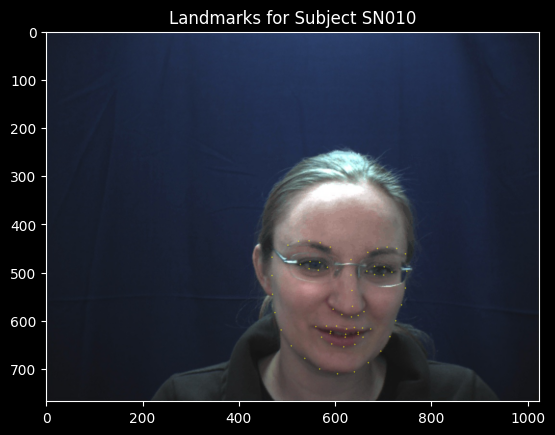

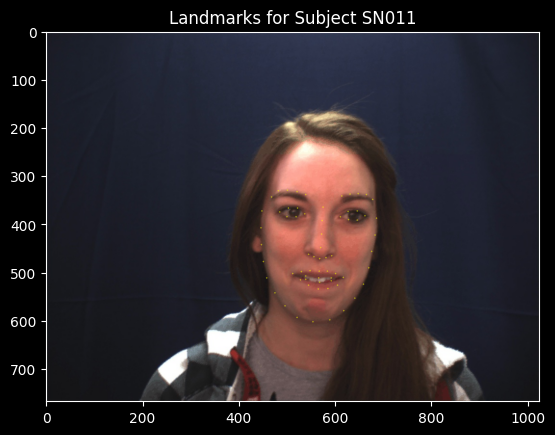

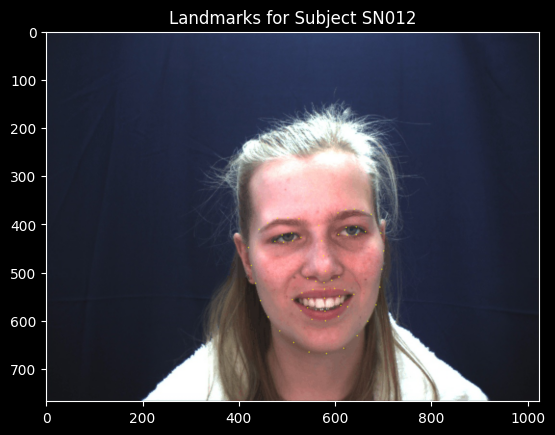

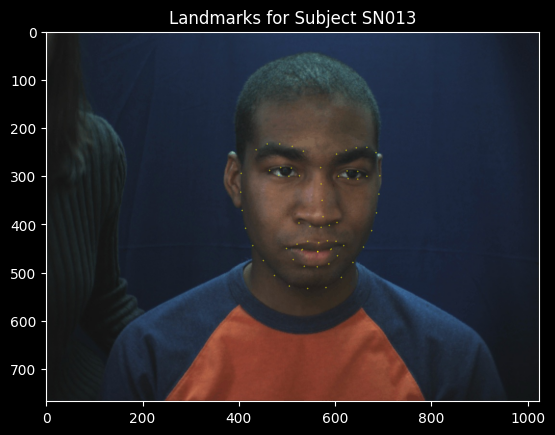

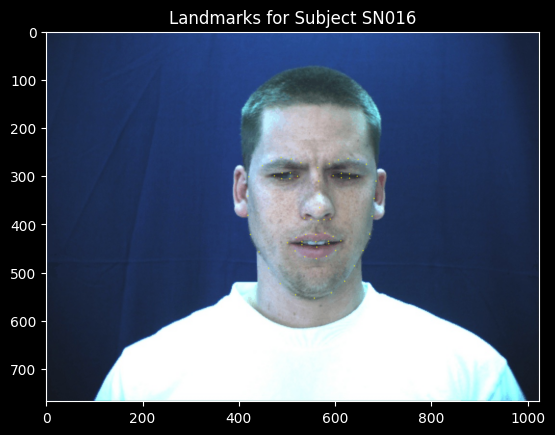

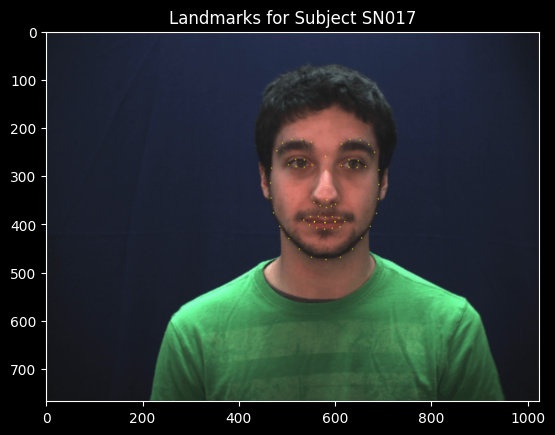

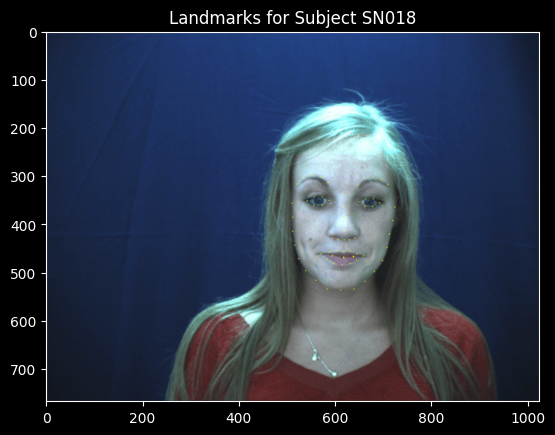

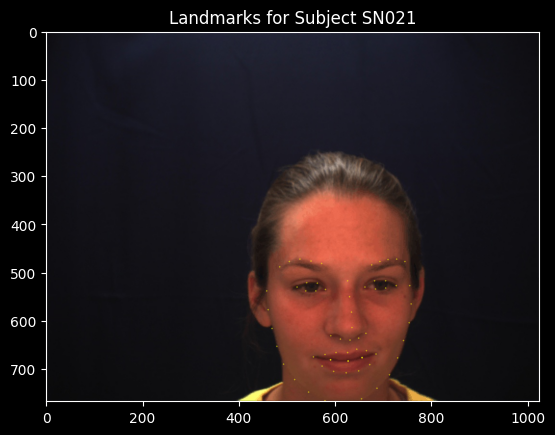

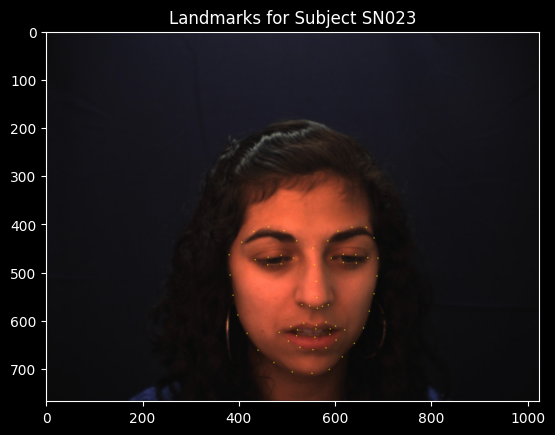

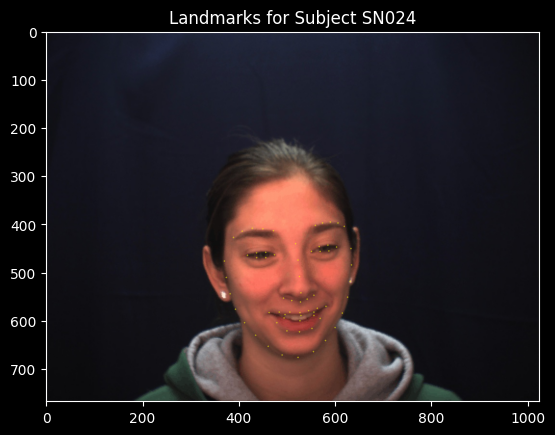

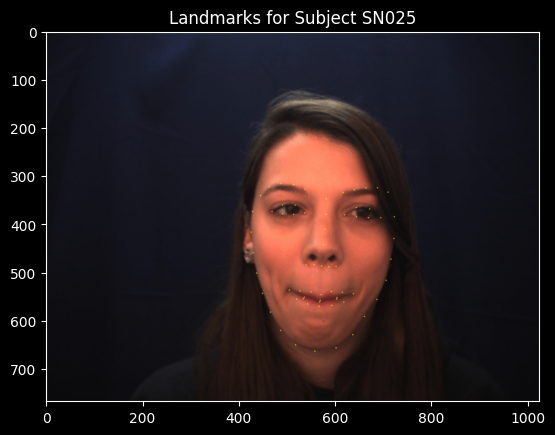

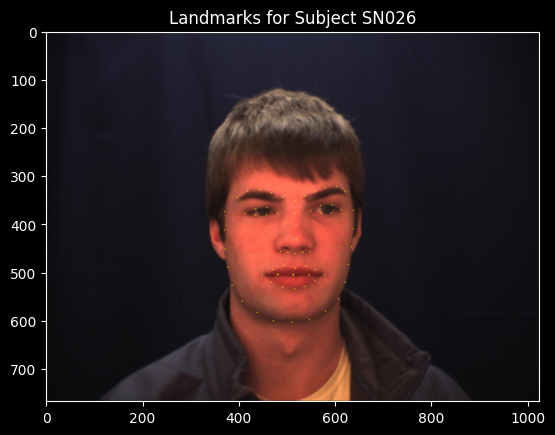

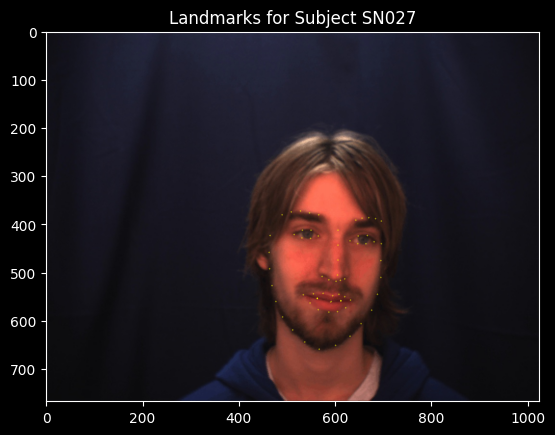

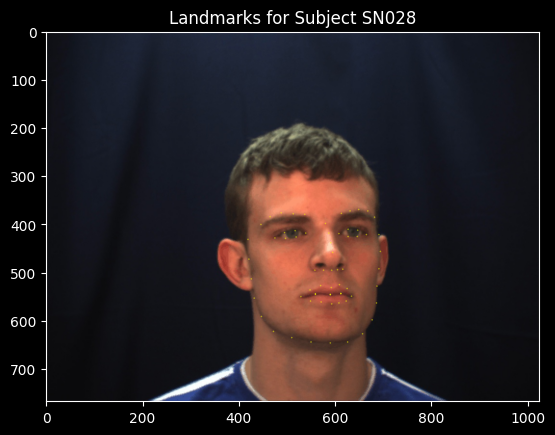

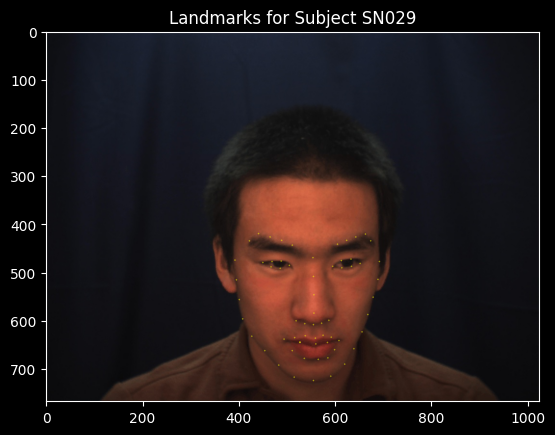

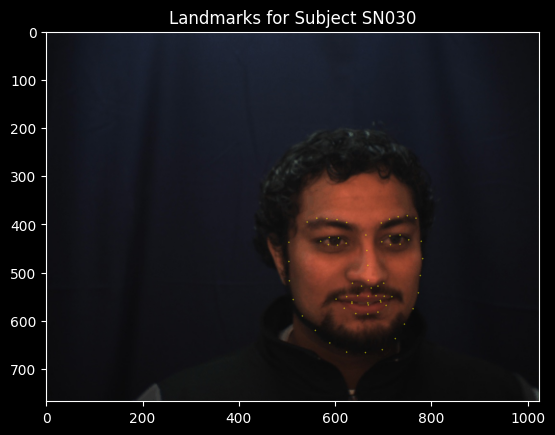

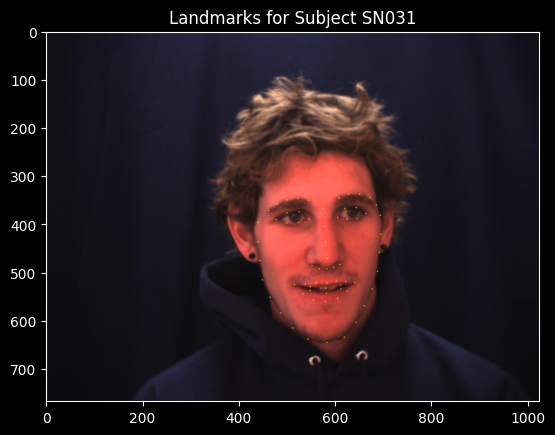

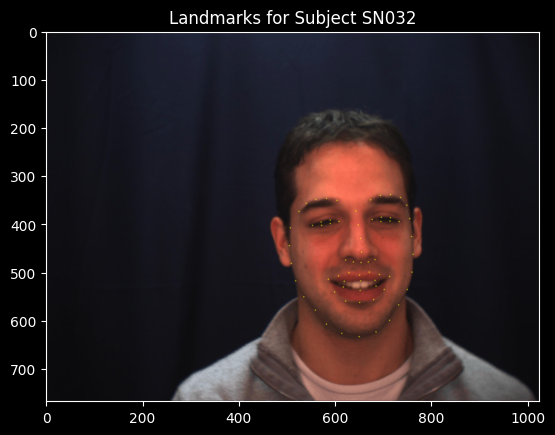

In [ ]:

def draw_landmarks(subject_id):
    json_file = os.path.join('json', f'{subject_id}.json')
    
    if not os.path.exists(json_file):
        print(f"No JSON file found for subject {subject_id}. Skipping...")
        return
    
    with open(json_file, 'r') as file:
        landmarks = json.load(file)
    
    # Assuming the first frame will be used to draw landmarks
    img_path = os.path.join("frames", f"LeftVideo{subject_id}_comp", "0.jpg")
    img = cv2.imread(img_path)
    
    if img is not None:
        for landmark in landmarks[0]['landmarks']:
            cv2.circle(img, (int(landmark[0]), int(landmark[1])), 1, (0, 255, 255), 1)

        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Landmarks for Subject {subject_id}")
        plt.show()
        cv2.imwrite(f"PreloadedLandmarks_{subject_id}.jpg", img)
    
for subject_id in subjectIds:
    draw_landmarks(subject_id)
